In [1]:
""" 
Coursework for k-means, spectral agglomerative clustering algorithms,
as well as ensemble clustering.
""" 

from matplotlib import pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
import warnings

## Part 1. K-means Clustering Analysis

### <span style="color:red">=========== Assignment 1 ===========</span>

<ipython-input-2-d8941bc3b55d>:90: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  model.fit(X)
<ipython-input-2-d8941bc3b55d>:100: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  model.fit(X)
<ipython-input-2-d8941bc3b55d>:110: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  model.fit(X)


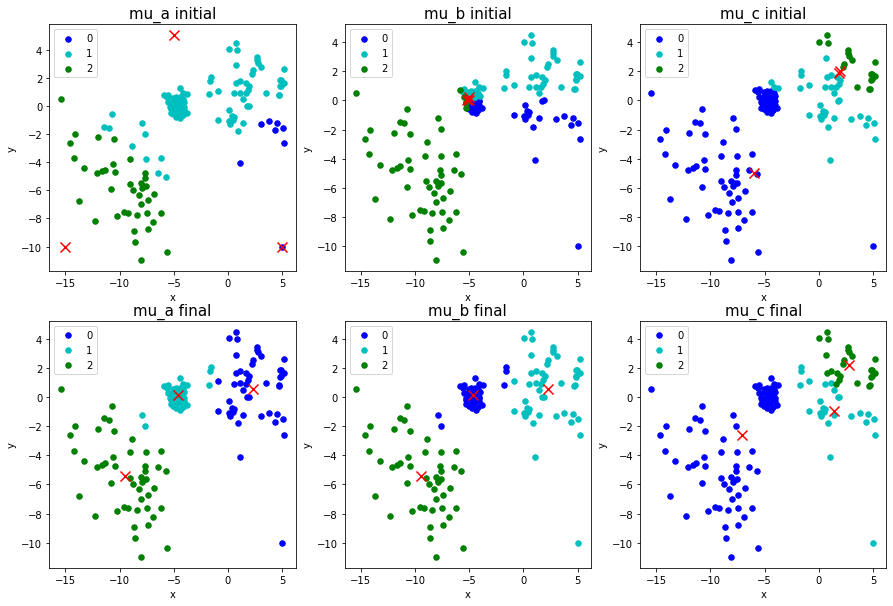

In [2]:
########################### K-means Clustering Analysis #######################################
# Assignment 1:
# ===
import pandas as pd
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(15,10))

X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) # The given initial mean points of (a) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) # The given initial mean points of (b) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) # The given initial mean points of (c) 

def partition(X, mu):
    """
    Helper function that performs a partition given the mean points using Euclidean distance
    Each input is numpy array:
        - X: (N,d) or (N,C,d), data points
        - mu: (C x d), the mean points
    
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """
    N = X.shape[0] # number of objects
    C = mu.shape[0] # number of clusters
   
    #tile x (N,d) to (N,C,D)
    if len(np.shape(X)) == 2:
        x_CND = np.tile(X,[C,1,1])#(N,d) -> (C,N,d)
        x_NCD = np.transpose(x_CND, axes = [1,0,2])
    distance_NC = np.sum((x_NCD - mu)**2,axis = 2)
    argmin_distance_N = np.argmin(distance_NC,axis = 1)
    distance_N = np.sqrt(np.min(distance_NC,axis = 1))
    partition = argmin_distance_N
    
    return partition

############################
# a) Implement a display function, where different clusters must be marked in different colours

def visualize_kmeans_res(mu,X,lb,title = ''):
    #####
    #   Your code here
    # ===
    k = len(np.unique(lb))
    
    targets = np.arange(0,k,1)
    colors = ['b','c','g','k','m','r','y','orange','grey','tan']
    
    data = pd.DataFrame(data=X,columns=['x','y'])
    y = pd.DataFrame(data=lb,columns=['cluster'])
    data = pd.concat([data,y],axis=1)
    
    plt.xlabel('x',fontsize=10)
    plt.ylabel('y',fontsize=10)
    plt.title(title, fontsize=15)

    for target,color in zip(targets,colors):
        indicesToKeep = data['cluster']==target
        plt.scatter(data.loc[indicesToKeep,'x']
                  ,data.loc[indicesToKeep,'y']
                  ,c=color
                  ,s=30)
    
    # plot mean point
    plt.scatter(mu[:,0]
          ,mu[:,1]
          ,c='r'
          ,s=100
          ,marker='x')
    
    plt.legend(targets)
    plt.plot()
    ###
    #   End of your code
    ###

    
#############################
# b) Display the final partitions where the initial and final mean points
#
#   Your code here
# ===
# Use mu_a as the initial mean point 
# print("Use mu_a as the initial mean point: ")
pa = partition(X,mu_a)
fig.add_subplot(2,3,1)
visualize_kmeans_res(mu_a,X,pa,title='mu_a initial')
model = KMeans(n_clusters=3,init=mu_a)
model.fit(X)
fig.add_subplot(2,3,4)
visualize_kmeans_res(model.cluster_centers_,X,model.labels_,title='mu_a final')

# Use mu_b as the initial mean point 
# print("Use mu_b as the initial mean point: ")
pb = partition(X,mu_b)
fig.add_subplot(2,3,2)
visualize_kmeans_res(mu_b,X,pb,title='mu_b initial')
model = KMeans(n_clusters=3,init=mu_b)
model.fit(X)
fig.add_subplot(2,3,5)
visualize_kmeans_res(model.cluster_centers_,X,model.labels_,title='mu_b final')

# Use mu_c as the initial mean point 
# print("Use mu_c as the initial mean point: ")
pc = partition(X,mu_c)
fig.add_subplot(2,3,3)
visualize_kmeans_res(mu_c,X,pc,title='mu_c initial')
model = KMeans(n_clusters=3,init=mu_c)
model.fit(X)
fig.add_subplot(2,3,6)
visualize_kmeans_res(model.cluster_centers_,X,model.labels_,title='mu_c final')

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

The best number of clusters is 5.


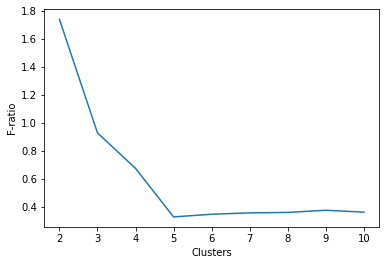

In [3]:
##########################
# Assignment 2 
#
# K-means algorithm cannot be used until the hyperparameter K (the
# number of clusters) is set up so the
# clustering result is better. We use f_ratio from the lecture
# to do so.
# ===
from sklearn.metrics.pairwise import euclidean_distances

################
# (a) Implement the scatter-based F-ratio index in Python 
#   where Euclidean distance is used

def f_ratio_euclidean(X,lb):
    """
    # Compute the f-ratio = k * ssw / ssb
    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - lb: (n,) label of each datapoint, each element is an
              integer, >=0, <n.
    
    Return:
        - f_ratio = k * ssw / ssb: scalar
    """ 
    k = len(np.unique(lb))
    _,d = np.shape(X)
    
    # SSW for each
    n = np.zeros(k)
    # center
    c = np.zeros([k,d])
    ###
    # Your code here
    
    ### initial SSW
    SSW = 0
    for label in range(0,k):
        idx = np.argwhere(lb==label)
        points = X[idx]
        # record the count
        n[label] = len(points)
        # calculate center
        c[label] = np.mean(points,axis=0)
        
        for po in points:
            SSW += np.sum(np.square(po-c[label]))
    
    SSB = 0
    M_global = np.mean(X,axis=0)
    for i in range(0,len(c)):
        SSB += n[i]*np.sum(np.square(c[i]-M_global))
        
    f_ratio = k * SSW / SSB
        
    ###
    # End of your code
    ###
    return f_ratio


warnings.filterwarnings('ignore')

################
# (b) For K = 2, 3, · · · , 10, run the the K-means each with 3 different random initialisation
#  on the 'kmeans_data_2.npy' dataset and plot F-ratio index versus K
#
# Your code here:
# ===
X = np.load('./Data/kmeans_data_2.npy')
f_ratios = []
for i in range(2,11):
    minF = None
    for random in range(1,4):
        model = KMeans(n_clusters=i,random_state=random)
        model.fit(X)
        f = f_ratio_euclidean(X,model.labels_)
        if(minF==None):
            minF = f
        else:
            minF = min(minF,f)
    f_ratios.append(minF)
plt.xlabel("Clusters")
plt.ylabel("F-ratio")
plt.plot(range(2,11,1),f_ratios)
minIndex = 2 + np.argmin(f_ratios)
print("The best number of clusters is %s."%(minIndex))

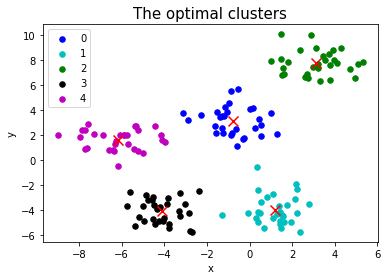

In [4]:
warnings.filterwarnings('default')
################
# (c) Display the final partition with optimal number of clusters
#
# Your code here:
# ===
model = KMeans(n_clusters=5)
model.fit(X)
visualize_kmeans_res(model.cluster_centers_,X,model.labels_,title='The optimal clusters')

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Spectral Clustering Analysis

### <span style="color:red">=========== Assignment 3 ===========</span>

Text(0.5, 1.0, 'datapoint and clustering result')

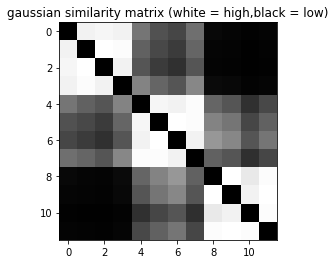

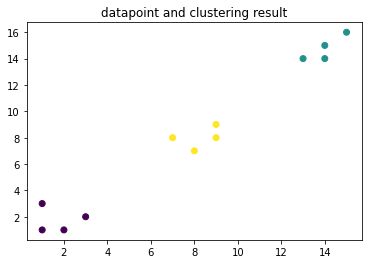

In [5]:

from sklearn.metrics import pairwise_distances
import math
def gaussian_similarity(X,delta):
    """
    # Compute the similarity matrix for spectral clustering using RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result

    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    W = np.zeros((len(X),len(X)))
    
    for i in range(0,len(X)):
        for j in range(0,len(X)):
            if i==j: continue
            W[i][j] = math.exp(-np.sum(np.square(X[i]-X[j]))/(2*(delta**2)))
    return W
    
    ###
    # Hint: The RBF kernel definition can be found in the lecture notes.

def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
            
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagnal matrix, which is simple to compute.
    # PS: There is no unreal eigen value here, but sometimes numerical precision problems happen
    #
    # First do eigen analysis. 
    #
    # Your code here :
    ###
    D = np.zeros_like(W)
    for i in range(0,len(D)):
        D[i][i] = np.sum(W[:,i])
    
    asymL = np.identity(len(D)) - np.dot(np.linalg.inv(D),W)
    
    U,Sigma,VT = np.linalg.svd(asymL)

    eigenVal = Sigma
    
    # sort idx from small to large
    idx = np.argsort(eigenVal)
    
    # 
    eigenVal = (Sigma[idx])[:k]
    eigenVec = (VT[idx].T)[:,:k]
    

    model = KMeans(n_clusters=k)
    model.fit(eigenVec)
 
    ###
    # End of your code
    ###
    return model.labels_,eigenVal,eigenVec


####### 
# Now test your implementation with toy data and provided hyper parameters.
# You should see a graph showing a clear block matrix, and a reasonable clustering result
# PS: this is just for testing. No suggestion of using what parameter
# ==
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])


W = gaussian_similarity(X,delta = pairwise_distances(X).std())
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

lb,_,_ = asymmetric_SC(W,3)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')

### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

a) One hyperparameter value for Gaussian kernel: 2
b) First non-zero eigen vector:
 [[-0.19275482 -0.18428961 -0.16755148 -0.19792159 -0.19628507 -0.08754515
  -0.12896118 -0.17641613 -0.09970654 -0.20323309]
 [-0.19169368 -0.18759936 -0.20074839 -0.04274489 -0.1685696  -0.20185516
  -0.19030435 -0.05481817 -0.2067551  -0.11378958]
 [-0.04235797 -0.09731426 -0.15782591 -0.09334378 -0.18105128 -0.07202628
  -0.11904828 -0.19838777 -0.1945841  -0.1650011 ]
 [-0.07440142 -0.1676309  -0.16607799 -0.20256381 -0.19579611 -0.14939045
  -0.18132546 -0.12877021 -0.14767797 -0.05153621]]


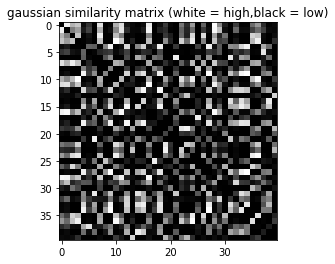

In [6]:
########################### 
# Assignment 4:
#
# Here you are to apply your implemented gaussian_similarity function to a dataset,
# saved in './Data/SC_data_1.npy'. You need to do:
#   a) find out an appropriate hyperparameter value in the Gaussian kernel
#   b) calculate and report the first non-zero eigen vector of laplacian L
#   c) decide how many clusters are in this data set and display results (you will work on this in the next cell)
#
# PS: in b), please do eigen analysis of 'L', not D^-1 L.
# ===
X = np.load('./Data/SC_data_1.npy')
###
# a) & b), You code here:
###
W = gaussian_similarity(X,delta = 2)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

D = np.zeros_like(W)
for i in range(0,len(D)):
    D[i][i] = np.count_nonzero(W[i])
L = D - W

U,Sigma,VT = np.linalg.svd(L)

eigenVal = Sigma

idx = np.argsort(eigenVal)

eigenVal = Sigma[idx]
eigenVec = VT[idx].T

###
# End of your code
#
# Fill your result below:
print('a) One hyperparameter value for Gaussian kernel:', 2)
print('b) First non-zero eigen vector:\n', np.reshape(eigenVec[:,0],(4,10)))

c)  2  clusters, because the gap of eigengap between 2 and 3 is the largest.


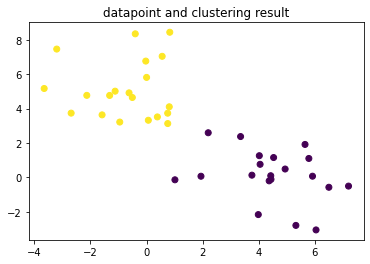

In [7]:
# c) Decide the number of clusters in this data set and display results 
# Your code here:
###

W = gaussian_similarity(X,2)
_,val,_ = asymmetric_SC(W,len(W))

# calculate eigen gap
bestIdx = 0;
bestGap = 0;
for i in range(0,len(W)-1):
    gap = val[i+1]-val[i]
    if(gap>bestGap):
        bestGap = gap
        bestIdx = i+1

lb,_,_ = asymmetric_SC(W,bestIdx)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')

###
#  End of your code
#
#  Fill your answer below:
###
print('c) ', bestIdx, ' clusters, because the gap of eigengap between 2 and 3 is the largest.' )

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

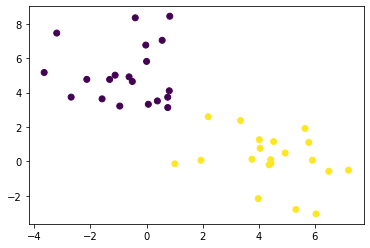

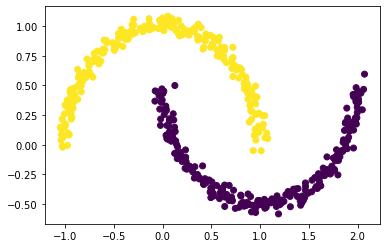

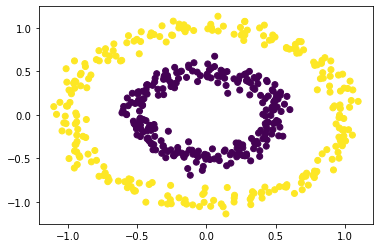

In [8]:
########################### 
# Assignment 5:
#
# Here you are to apply your implemented gaussian_similarity function to 
# more datasets and display results. You need to find proper hyper parameters
# ===
X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')

###
#  Your code here
###
W1 = gaussian_similarity(X1,delta = 0.1)

lb1,_,_ = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c = lb1)

W2 = gaussian_similarity(X2,delta = 0.01)
lb2,_,_ = asymmetric_SC(W2,2)
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c = lb2)

W3 = gaussian_similarity(X3,delta = 0.1)
lb3,_,_ = asymmetric_SC(W3,2)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c = lb3)


### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 3. Hierarchical Clustering Analysis

### <span style="color:red">=========== Assignment 6 ===========</span>

b) The number of the clusters of single is 2 
 The number of the clusters of complete is 3 
 The number of the clusters of average is 2


Text(0.5, 1.0, 'average-linkage')

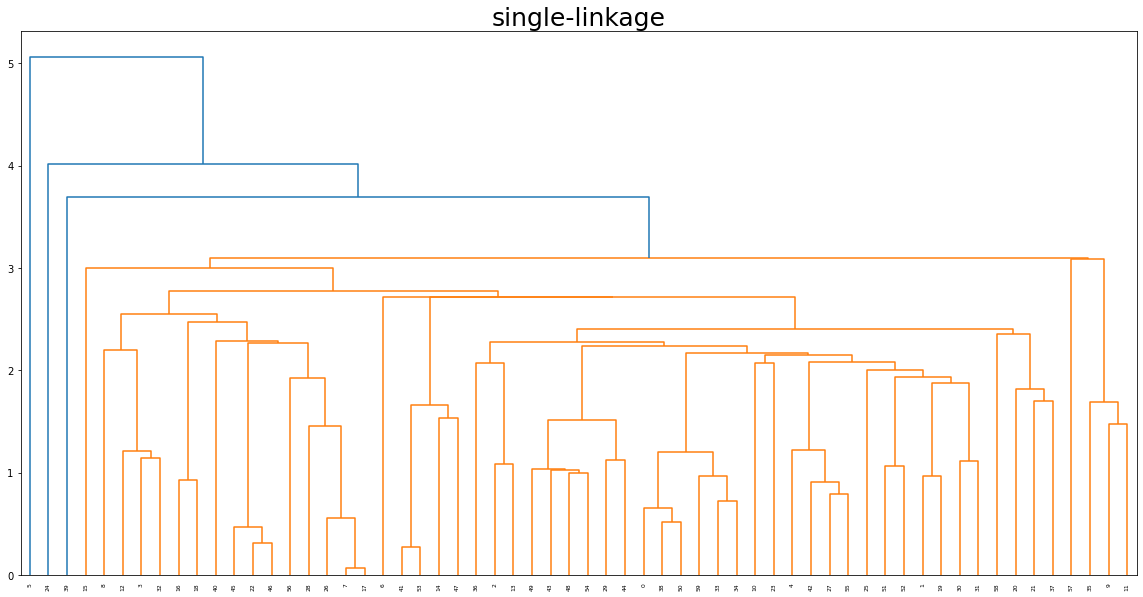

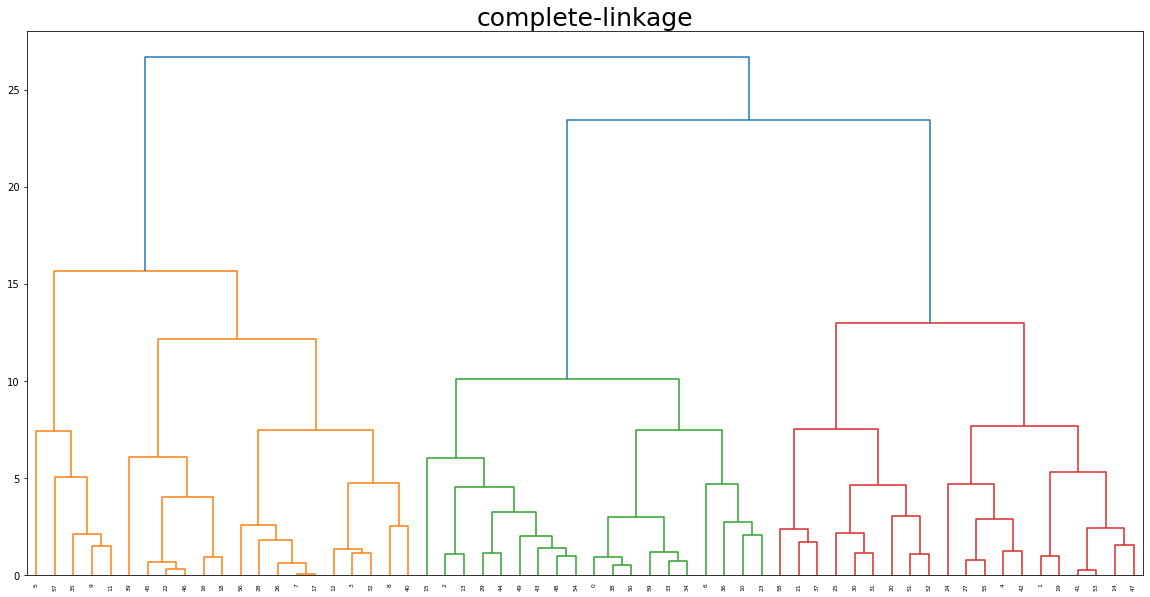

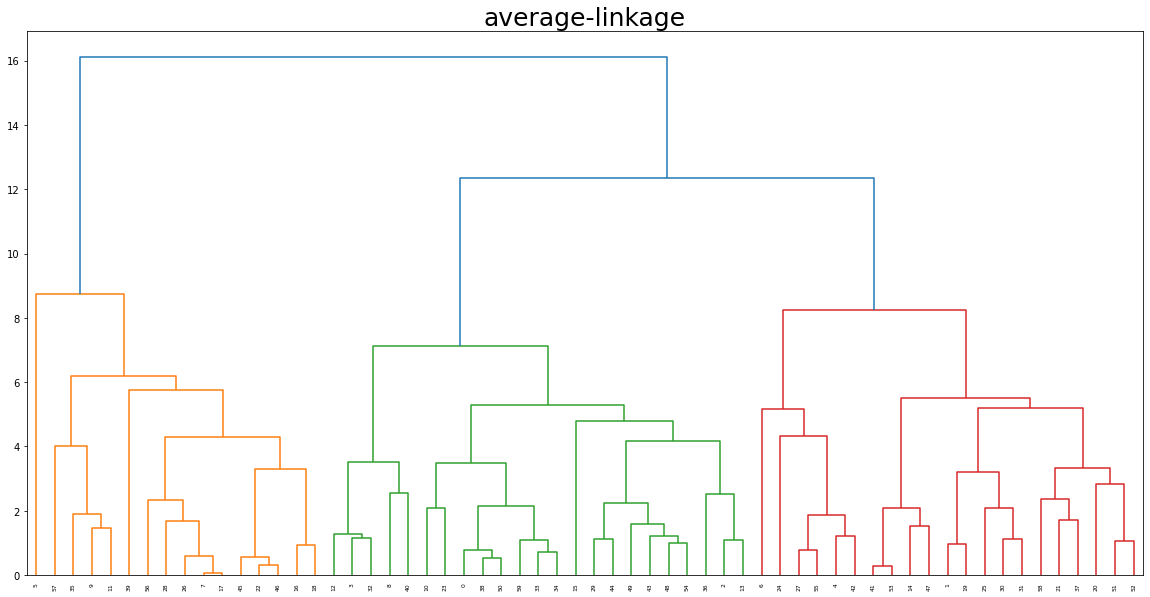

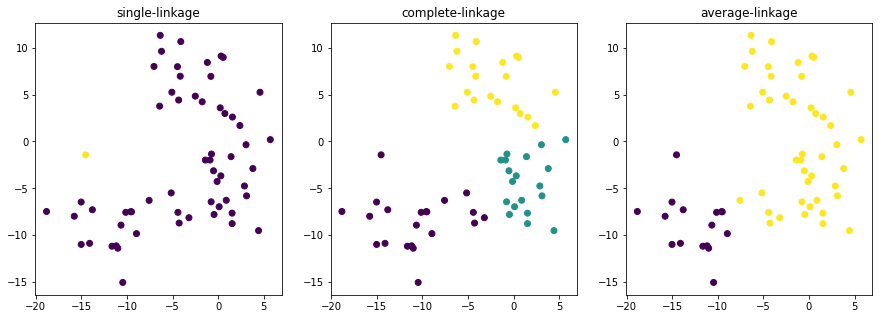

In [9]:
########################### 
# Assignment 6:
#
# Here, you are to use built-in functions in scipy.cluster.hierarchy: 'linkage, dendrogram' to 
# do hierachical clustering.
#
# You need to: a) plot three dendrogram trees achieved by the use of
# three cluster-distance measures in the agglomerative algorithm; (b) report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a), respectively; 
# (c) display 3 clustering results achieved by (a) and (b)
# ===
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics.pairwise import euclidean_distances
X = np.load('./Data/HC_data.npy')


# a):
# A (?,4) shape matrix Z should returned. At the i-th iteration, 
#   clusters with indices Z[i, 0] and Z[i, 1] are combined 
#   to form cluster . A cluster with an index less than n
#   corresponds to one of the n original observations. 
#   The distance between clusters Z[i, 0] and Z[i, 1] is 
#   given by Z[i, 2]. The fourth value Z[i, 3] represents 
#   the number of original observations in the newly formed cluster.
#
#   Then, plot the clustering result as a Dendrogram
#       The dendrogram illustrates how each cluster is composed by drawing a U-shaped
#       (or n-shaped) link between a non-singleton cluster and its children. The top of the 
#       U-link indicates a cluster merge. The two legs of the U-link indicate 
#       which clusters were merged. The horizental coordinates of a merge 
#       represents the distance between the two clusters. 
#
#  Your code here
###
Z1 = linkage(y=X, method='single',metric='euclidean')
plt.figure(figsize=(20, 10))
plt.title('single-linkage',fontdict={'size': 25})
dendrogram(Z1)

Z2 = linkage(y=X, method='complete',metric='euclidean')
plt.figure(figsize=(20, 10))
plt.title('complete-linkage',fontdict={'size': 25})
dendrogram(Z2)

Z3 = linkage(y=X, method='average',metric='euclidean')
plt.figure(figsize=(20, 10))
plt.title('average-linkage',fontdict={'size': 25})
dendrogram(Z3)
    

# (b) Now, report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a)
#
# Fill your answer here: 

gap1 = 0
maxGap1Idx = -1
height1 = Z1[:,2]
for i in range(1,len(height1)):
    gapOne = height1[i]-height1[i-1]
    if(gapOne>gap1):
        gap1 = gapOne
        maxGap1Idx = i
cutLine1 = (height1[maxGap1Idx]+height1[maxGap1Idx-1])/2 
cluster1= fcluster(Z1, t=cutLine1,criterion='distance')

gap2 = 0
maxGap2Idx = -1
height2 = Z2[:,2]
for i in range(1,len(height2)):
    gapOne = height2[i]-height2[i-1]
    if(gapOne>gap2):
        gap2 = gapOne
        maxGap2Idx = i
cutLine2 = (height2[maxGap2Idx]+height2[maxGap2Idx-1])/2 
cluster2 = fcluster(Z2, t=cutLine2,criterion='distance') 

gap3 = 0
maxGap3Idx = -1
height3 = Z3[:,2]
for i in range(1,len(height3)):
    gapOne = height3[i]-height3[i-1]
    if(gapOne>gap3):
        gap3 = gapOne
        maxGap3Idx = i
cutLine3 = (height3[maxGap3Idx]+height3[maxGap3Idx-1])/2 
cluster3 = fcluster(Z3, t=cutLine3,criterion='distance') 


print('b) The number of the clusters of single is %s \n'%len(np.unique(cluster1)),
     'The number of the clusters of complete is %s \n'%len(np.unique(cluster2)),
     'The number of the clusters of average is %s'%len(np.unique(cluster3)))

# (c) Display clustering results
# Your code here: 
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c = cluster1)
plt.title('single-linkage')

plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,1],c = cluster2)
plt.title('complete-linkage')

plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,1],c = cluster3)
plt.title('average-linkage')

### <span style="color:red">=========== End of Assignment 6 ===========</span>

## Part 4. Ensemble Clustering Analysis

### <span style="color:red">=========== Assignment 7 ===========</span>

In [10]:
########################### 
# Assignment 7:
#
# Here, you are to implement the evidence-accumulated clustering algorithm based on K-means 
# and the agglomerative algorithms in Python.
#
# Hint: To implement the ensemble_clustering function, you can use the
# build-in functions, sklearn.cluster.KMeans , in the scikit-learn library for K-means cluster-
# ing, the scipy.cluster.hierarchy.linkage and scipy.spatial.distance.squareform in the
# scipy library for hierarchical clustering
# ===


# ============
# Compute co-association matrix
# ============
# Let's firstly compute the co-association matrix for ONLY SINGLE cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    
    # Initialize the co-association matrix
    n = y.shape[0]
    co_matrix = np.zeros(shape=(n,n))

    ###    
    # Your code here
    #
    # To do: finish the computation of co_matrix for single cluster
    ###
    for i in range(0,len(y)):
        for j in range(0,len(y)):
            if i==j:continue
            if y[i]==y[j]:
                co_matrix[i][j]+=1
    
    
    ###
    # End of your code
    ###                
    return co_matrix


# Test your implementation
y = np.array([0,1,0,1,0])
co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
co_matrix_tmp
# It should show a square symmetric matrix, where each element is 0 or 1

array([[0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.]])

In [11]:
# Now compute the co-association matrix for MULTIPLE cluster results
from sklearn.preprocessing import Normalizer
def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (N,N). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    N = len(y_list)
    
    # Initialize matrix
    n = y_list[0].shape[0]
    co_matrix = np.zeros([n,n],dtype = np.float32)
    ###   
    # Your code here    
    #
    # Hint: Use the 'compute_co_matrix_for_single_cluster(y)' you have finished
    #       to compute the co-association matrix for each cluster result,
    #       then add them together. Don't forget to normalize.
    #
    ###
    for y in y_list:
        co_matrix+=compute_co_matrix_for_single_cluster(y)
    co_matrix = co_matrix/N
    
    
    ###
    # End of your code
    ###
    return co_matrix


# Test your implementation
y1 = np.array([0,1,0,1,0])
y2 = np.array([0,1,1,1,0])
y3 = np.array([0,1,1,1,1])
co_matrix_tmp = compute_co_matrix([y1,y2,y1,y1,y1,y2,y1,y3])
co_matrix_tmp

array([[0.   , 0.   , 0.625, 0.   , 0.875],
       [0.   , 0.   , 0.375, 1.   , 0.125],
       [0.625, 0.375, 0.   , 0.375, 0.75 ],
       [0.   , 1.   , 0.375, 0.   , 0.125],
       [0.875, 0.125, 0.75 , 0.125, 0.   ]], dtype=float32)

In [12]:
# ============
# Implement the ensemble clustering given a co_matrix
# ============
import scipy
from scipy.spatial.distance import squareform

def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensamble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    ###
    # Your code here
    #
    # To do: ensemble the clustering results with Agglomerative Clustering
    # Hint: see 'scipy.cluster.hierarchy.linkage' and 
    #           'scipy.spatial.distance.squareform'
    #
    # Hint2: 'squareform' function requires zero element on diagonal
    ###
    d = 1-co_matrix
    for i in range(0,len(d)):
        d[i][i] = 0
    
    Z = linkage(squareform(d), method=link_type)
    
    ###
    # End of your code
    ###
    return Z

### <span style="color:red">=========== End of Assignment 7 ===========</span>

### <span style="color:red">=========== Assignment 8 ===========</span>

The intial partitions of Cluster is [15, 18, 21, 25, 26, 22, 23, 28, 15, 21, 24, 14, 19, 10, 23, 17, 11, 27, 23, 20, 17, 16, 27, 13, 27, 22, 26, 28, 10, 25]  and the cluster-distance measure is single.


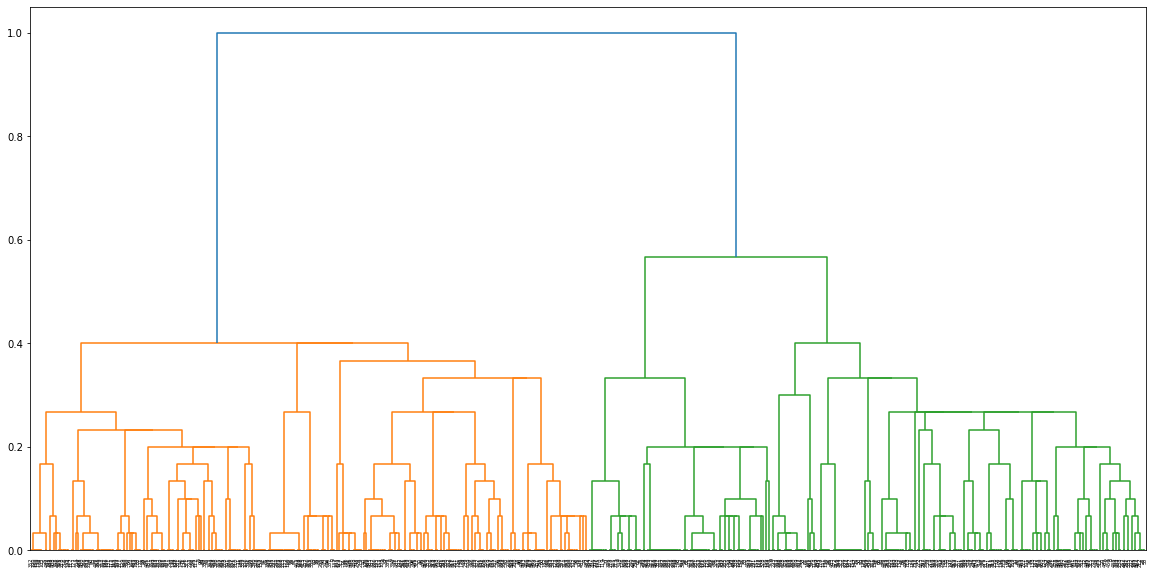

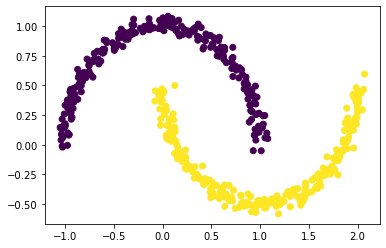

In [13]:
########################### 
# Assignment 8:
#
# Here, you are to Apply your implemented ensemble_clustering function to two datasets,
# SC_data_2.npy and SC_data_3.npy
#
# You will need to first get a list of clustering results by K-means (you also 
# need to choose the n_clusters), you can use the built in K-means function in sklearn.cluster.
#
# Then you will need to compute the co_matrix with your implemented function, and then
# get and display the clustering result with your implementation. Meanwhile, you need 
# to choose a proper distance measurement (the 'linkage' parameter) to make your algorithm
# work.
#
# ===
np.random.seed(1) # Ensure the results are same on submission
X = np.load('./Data/SC_data_2.npy')
###
# Now apply your ensemble clustering to the first dataset './Data/SC_data_2.npy', display results
#
# Your code here 
###
lbs = []
modelKs = []
for _ in range(0,30):
    k = np.random.randint(10,30)
    modelKs.append(k)
    model = KMeans(n_clusters=k,init='random',random_state=np.random.randint(99))
    model.fit(X)
    lbs.append(model.labels_)
    
co_matrix = compute_co_matrix(lbs)
Z = ensemble_clustering(co_matrix,link_type='single')
print('The intial partitions of Cluster is %s'%modelKs, 
      " and the cluster-distance measure is single.")
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z)


gap = 0
maxGapIdx = -1
height = Z[:,2]
for i in range(1,len(height)):
    gapOne = height[i]-height[i-1]
    if(gapOne>gap):
        gap = gapOne
        maxGapIdx = i
cutLine = (height[maxGapIdx]+height[maxGapIdx-1])/2 

cluster= fcluster(Z, t=cutLine,criterion='distance') 
plt.figure()
plt.scatter(X[:,0],X[:,1],c = cluster)

The intial partitions of Cluster is [15, 18, 21, 25, 26, 22, 23, 28, 15, 21, 24, 14, 19, 10, 23, 17, 11, 27, 23, 20, 17, 16, 27, 13, 27, 22, 26, 28, 10, 25]  and the cluster-distance measure is single.


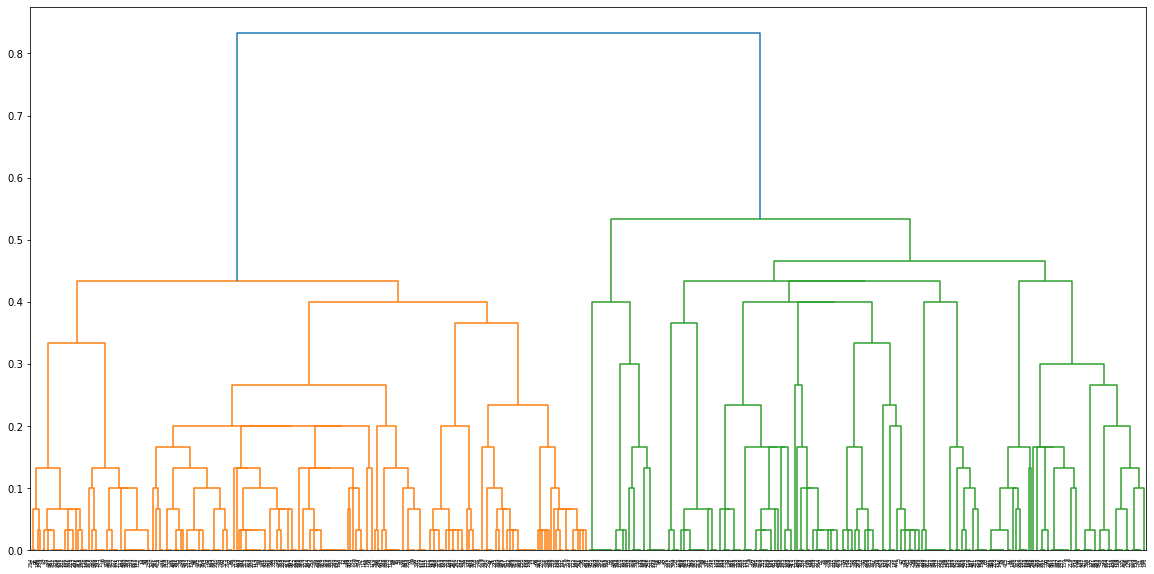

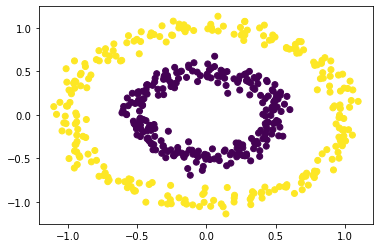

In [14]:
X = np.load('./Data/SC_data_3.npy')

np.random.seed(1)
# Now apply your ensemble clustering to the second dataset, './Data/SC_data_3.npy', display results
#
# Your code here 
###
lbs = []
modelKs = []
for _ in range(0,30):
    k = np.random.randint(10,30)
    modelKs.append(k)
    model = KMeans(n_clusters=k,init='random',random_state=np.random.randint(99))
    model.fit(X)
    lbs.append(model.labels_)
co_matrix = compute_co_matrix(lbs)
Z = ensemble_clustering(co_matrix,link_type='single')
print('The intial partitions of Cluster is %s'%modelKs, 
      " and the cluster-distance measure is single.")
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z)



gap = 0
maxGapIdx = -1
height = Z[:,2]
for i in range(1,len(height)):
    gapOne = height[i]-height[i-1]
    if(gapOne>gap):
        gap = gapOne
        maxGapIdx = i
cutLine = (height[maxGapIdx]+height[maxGapIdx-1])/2 

cluster= fcluster(Z, t=cutLine,criterion='distance') 
plt.figure()
plt.scatter(X[:,0],X[:,1],c = cluster)


### <span style="color:red">=========== End of Assignment 8 ===========</span>